## AMOD:5440H Data Mining
**Assignment 1**  
Nicholas Hopewell 0496633  
October 27, 2017


The task of the assignment is to select a data set, preprocess the data, visualize the data in at least five different ways, use SciKit-Learn to train three different classification models using a selected data set, and finally, evaluate and compare models using 10-fold cross validation.  

In [266]:
import csv

# For importing and working with tabular data:

import numpy as np
import pandas as pd

# For visualizations:

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# so plots are displayed in line within jupyter notebook
%matplotlib inline

# For preprocessing purposes: 

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

#  to ignore coversion warnings when standardizing
import warnings
warnings.filterwarnings("ignore")


**Sections**  

    a) Import, describe, and inspect data  
    b) Preprocess and visualize data   
    c) Train models  
    d) Evaluate models and conclude

## a) Import and Inspect Data 

  
  
First, the data csv file was loaded into a pandas dataframe and the first 20 rows of the data were printed out.

In [540]:
# read csv file into a pandas dataframe indicating that the first row contains column names. 

cancerData = pd.read_csv("/Users/nicho/Desktop/Assignments/Data Mining assignments/Assignment 1/breastcancer.csv", header = 0)

In [522]:
# print out the first 20 rows, the 20th row shows the first benign diagnosis of the data set.

cancerData.head(20)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,NaN


**Topic Overview**  

According to statistics reported by the Canadian Cancer Society, breast cancer is the most common cancer among Canadian women. Of all cancer-related deaths amongst Canadian women, breast cancer is the second largest leading contributor. Breast cancer can also occur in men, but it is very uncommon. This year, an estimated 26,300 Canadian women will receive a breast cancer diagnosis. This number represents 25% of all new cancer cases in women in 2017. Current estimates suggest that about 1 in 8 Canadian women will develop breast cancer during her lifetime and 1 in 31 will die from it. Breast cancer occurs is a result of tumor growth (abnormal rates of cells division) in breast tissue. Not all tumors lead to a diagnosis of cancer. Tumors fall under two main categories: benign (not cancerous) or malignant (cancerous).

  
*Canadian Cancer Statistics Advisory Committee. Canadian Cancer Statistics 2017. Toronto, ON: Canadian Cancer Society; 2017.   
Available at: cancer.ca/Canadian-Cancer-Statistics-2017-EN.pdf.*


**Data Description**

To learn more about features that are useful for building a model to classify breast cancer diagnoses, diagnostic data from breast cancer patients at a hospital in Wisconsin was used. Features are computed from images of a fine needle aspirate (FNA) of a breast mass. Essentially, this FNA procedure involves removing fluid samples from breast mass tissue with a fine needle in order to examine cells. Each feature describes characteristics of the cell nuclei taken from the images.  


**Attribute Information**

Target (diagnosis):   

    M = malignant breast cell mass.
    B = benign breast cell mass.

The first two columns include:

    Patient ID
    Diagnosis (classes M and B)
    
For each cell nucleus, the following ten characteristics were measured:

    Radius = mean of all distances from the center to points on the perimeter
    Texture = standard deviation of gray-scale values
    Perimeter = perimeter of nucleus 
    Area = area of nucleus
    Smoothness = local variation in radius lengths
    Compactness = perimeter^2 / area - 1.0
    Concavity = severity of concave portions of the contour
    Concave points = number of concave portions of the contour
    Symmetry = symmetry of cells
    Fractal dimension  = “coastline approximation” - 1  
    
These features are useful in building a classification model for breast cancer diagnoses. It is very helpful to do a quick google image search to see what growing cancer cells look like in order to see how these feature values would change as cancer developes. I will attach an image below. 
    
For each characteristic three measures are given:

    Mean  
    Standard error  
    Largest/worst (mean of the three largest values)  
    
Only the mean and worst features are meaningful to use as the using the standard deviation of a measurement value for classifcation purposes does nt make sense.

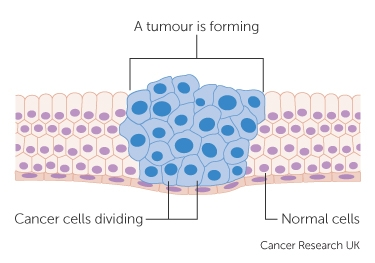

In [315]:
from IPython.display import Image

# display image of tumor, if I rememeber I will try to include ths image in my hand in so the TA can see it.
Image(filename = "/Users/nicho/Desktop/img/tumor.png", width = 600)

Initial inspections of the data: 

In [268]:
# See the shape of the data in terms of rows by columns:

cancerData.shape

(569, 33)

The data set has 569 rows (one for each patient) and 31 columns (one for each feature after 'id' and 'Unnamed: 32' were dropped from the data set - see below). Before these columns are dropped, the dataset has 33 columns in total. 

In [269]:
# See what type of data our variables are store in: 

cancerData.get_dtype_counts()

float64    31
int64       1
object      1
dtype: int64

From the above, after 'id' and 'Unnamed: 32' were removed (see below), our data are floats. 

To get a class breakdown, the values of the target feature can be counted:

In [270]:
# See how many benign and malignant cases there are:

cancerData['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

Of the 569 patients, 357 were given a benign diagnosis while 212 were given a malignant diagnosis.

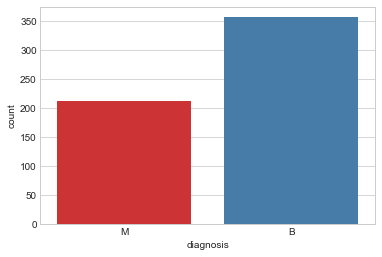

In [271]:
#  From seaborn, create plot for diagnosis column of bcancerData
#  Adding the ';' at the end surpresses output. 

sns.countplot(cancerData['diagnosis'], label='Count', palette="Set1");

Above is a barplot of the diagnosis labels. The bar labeled 'M' represents the count of malignant diagnoses whereas the bar labeled 'B' represens the count of benign diagnoses.

## b) Visualization +  Preprocess Data

At this stage it is important to determine how to clean up and transform the data for modelling purposes. Before preprocessing is done, it is useful to do a bit of exploratory data anlysis to find interesting characteristics about the data.

First, the data must be checked for missing records:

In [272]:
#  Check for missing values in the dataset, specifying any() will return True or False for each variable if any one data point
#  is missing in that data field. If we did not include this call, the dataframe in its entirety would return with True 
#  indicating missing data points.

cancerData.isnull().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

There are no missing values in this data set so we do not need to consider the appropriateness of mean, median, and percentile trimmed mean substitutions nor how to work with missing values during each classification model training.  

The 'id' column containing patient id numbers the 'Unnamed: 32' column containing NaN (not a number) values are meaningless for classification purposes and can be cut from the dataset before looking into summary statistics and bivariate relationships
within the data.

In [541]:
#  drop 'id' column (inplace=True means to operate directly on the data frame object, if we wanted to have a new object 
#  could do fixedData = bcancerData(...) we could specficy inplace=False:
cancerData.drop('id', inplace=True, axis=1)

In [542]:
# drop 'Unnamed:32' column:
cancerData.drop('Unnamed: 32', inplace=True, axis=1)

In [275]:
# make sure 'id' and 'Unnamed: 32' are dropped from data frame:
cancerData.head(1)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189


In [276]:
#  Another way to do this would be to print out the column names:

print(cancerData.columns)

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


**Summary Statistics**  

To start, it would be beneficial to first look for any interesting distributions of feature values and explore the structure of the data. To get a quick description of the data set, looking at the summary statistics may be helpful:

In [277]:
#  Get summary statistics of all features in the data set
#  Could also .unstack()

cancerData.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Above descriptive statistics are displayed. Means, standard deviations, interquartile ranges, minimum, and maximum values are included. These values before splitting the data over the diagnosis column are not incredibly helpful for the purpose of this analysis but they do give an idea about the types of values and the magnititude of the values included in the data set.

It is more useful to subset the data based on diagnosis received and compare descriptive statistics this way to see if any 
differences are immediately obvious before visualzation and bivariate correlations. Our target is the patient diagnosis so it would make sense in this case that individuals who were diagnosed as having a benign tumor versus those who were diagnosed with having a malignant tumor would differ in terms of the attribute values used to build a classification model.

In [278]:
#  Subset by those who received a begnign diagnosis, get desctiptive statistics

benignData = cancerData[cancerData.diagnosis == 'B']
benignData.describe()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,...,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
std,1.780512,3.995125,11.807438,134.287118,0.013446,0.033750,0.043442,0.015909,0.024807,0.006747,...,1.981368,5.493955,13.527091,163.601424,0.020013,0.092180,0.140368,0.035797,0.041745,0.013804
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.051850,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156600,0.055210
25%,11.080000,15.150000,70.870000,378.200000,0.083060,0.055620,0.020310,0.015020,0.158000,0.058530,...,12.080000,19.580000,78.270000,447.100000,0.110400,0.112000,0.077080,0.051040,0.240600,0.070090
50%,12.200000,17.390000,78.180000,458.400000,0.090760,0.075290,0.037090,0.023440,0.171400,0.061540,...,13.350000,22.820000,86.920000,547.400000,0.125400,0.169800,0.141200,0.074310,0.268700,0.077120
75%,13.370000,19.760000,86.100000,551.100000,0.100700,0.097550,0.059990,0.032510,0.189000,0.065760,...,14.800000,26.510000,96.590000,670.000000,0.137600,0.230200,0.221600,0.097490,0.298300,0.085410
max,17.850000,33.810000,114.600000,992.100000,0.163400,0.223900,0.410800,0.085340,0.274300,0.095750,...,19.820000,41.780000,127.100000,1210.000000,0.200600,0.584900,1.252000,0.175000,0.422800,0.148600


In [279]:
#  Subset by those given a malignent diagnosis, get descriptive statistics:

maligData = cancerData[cancerData.diagnosis == 'M']
maligData.describe()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,...,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
std,3.203971,3.779470,21.854653,367.937978,0.012608,0.053987,0.075019,0.034374,0.027638,0.007573,...,4.283569,5.434804,29.457055,597.967743,0.021870,0.170372,0.181507,0.046308,0.074685,0.021553
min,10.950000,10.380000,71.900000,361.600000,0.073710,0.046050,0.023980,0.020310,0.130800,0.049960,...,12.840000,16.670000,85.100000,508.100000,0.088220,0.051310,0.023980,0.028990,0.156500,0.055040
25%,15.075000,19.327500,98.745000,705.300000,0.094010,0.109600,0.109525,0.064620,0.174050,0.056598,...,17.730000,25.782500,119.325000,970.300000,0.130475,0.244475,0.326425,0.152750,0.276500,0.076302
50%,17.325000,21.460000,114.200000,932.000000,0.102200,0.132350,0.151350,0.086280,0.189900,0.061575,...,20.590000,28.945000,138.000000,1303.000000,0.143450,0.356350,0.404900,0.182000,0.310300,0.087600
75%,19.590000,23.765000,129.925000,1203.750000,0.110925,0.172400,0.203050,0.103175,0.209850,0.067075,...,23.807500,32.690000,159.800000,1712.750000,0.155975,0.447850,0.556175,0.210675,0.359225,0.102625
max,28.110000,39.280000,188.500000,2501.000000,0.144700,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.170000,0.291000,0.663800,0.207500


Immediately what jumps off the page are the consistently larger mean, max, and interquartile range values (middle 50% of data) for the features of the malignant subset data. Looking at the magnitude of mean differences between these two groups, values are striking. It is clear that the images these features are based off of show very different stages of breast mass development. Looking at breast tissue radius, perimeter and area means, patients diagnosed with malignant masses seem to have significantly larger breast mass which makes sense as this would indicate a further stage of breast cancer development. This is further reinforced by another key observation that is the very large differences in perimeter_worst and area_worst means. Initially, I predict that these features will likely be important when it comes to classifying patients as either having a benign or malignant diagnosis.  


**Density Plots**  

To further explore these differences, histograms or density plots can be used. In this case density plots will be used. Plotting with either a density plot or a frequency histogram gives an idea of the shape of the distribution as well as the values the distribution are centered around.

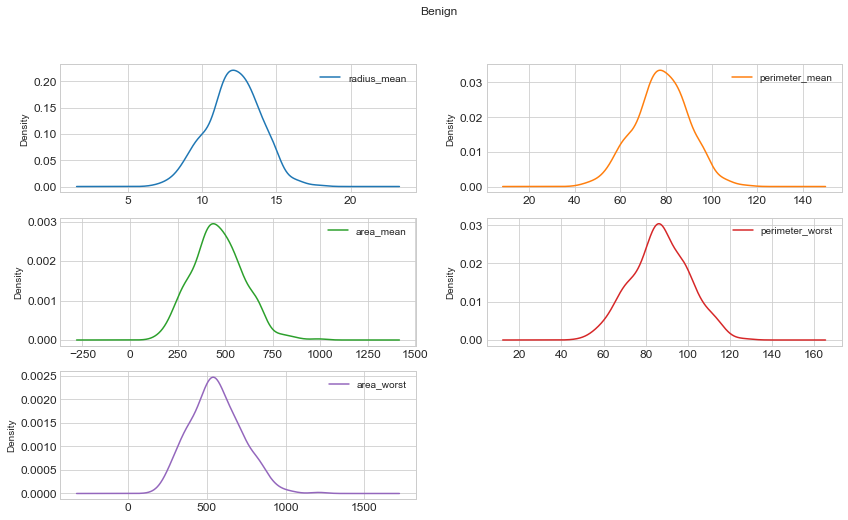

In [280]:
#  Subset the benignData by column labels using .loc specifying the features which were determined as likely being important when
#  looking at descriptives. The same was done for maligData

#  could have also used .iloc to split based on positions rather than labels. 
keybData = benignData.loc[:,['radius_mean', 'perimeter_mean', 'area_mean','perimeter_worst', 'area_worst']]
keymData = maligData.loc[:,['radius_mean', 'perimeter_mean', 'area_mean','perimeter_worst', 'area_worst']]


#  A density plot for the split benignData laid out in two rows of three subplots plots.

densBenign = keybData.plot(kind= 'density',title = "Benign", subplots=True, layout=(3,2), sharex=False, 
                     sharey=False,fontsize=12, figsize=(14,8))



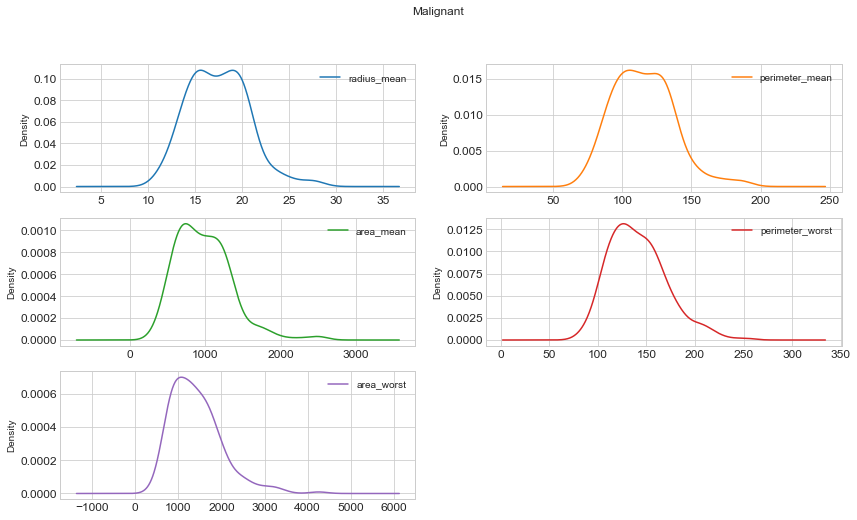

In [281]:
#  A density plot for the split maligData laid out in two rows of three subplots plots.

densMalig = keymData.plot(kind= 'density', title = "Malignant", subplots=True, layout=(3,2), sharex=False, 
                     sharey=False,fontsize=12, figsize=(14,8))


From looking at these density plots we can see that values for the malignant patients are centered at much higher ranges and that the right tails of the malignant distributions are quite heavier than those of the benign distributions. Overall, the malignant subset data approaches more of an ex-Gaussian distribution. This means if we were to sample from these distributions, we would be much more likely to see higher values in general and would be more likely to find extreme positive scores from the malignant group than from the benign group. This makes sense because, as previously mentioned, it would be typical that a tumor which has developed to later stages would have grown significantly compared to a less developed tumor, and thus, be more likely to be diagnosed as malignant. It also makes sense that the malignant subset would have more extreme scores because if a patient had a value for any of these features much higher than the corresponding mean value they would likely have a malignant tumor. As a layperson who does not have much knowledge about cancer development, I am not sure if a cancerous tumor causes this abnormal growth of cells or if the abnormal growth of tumor cells, if allowed to develop, leads to a tumor being classified as cancerous/malignant. That being said, there is a clear relationship between the features of the FNA images and the diagnosis received. 

Features could further be split and visualized for interesting trends but at this stage these features seem to be important. I believe that more features will be determined as important for classification but the features initially selected tell a quite clear story during this more exploratory phase.

**Box Plots**  


Another way to visualize the data would be through box plots. Box plots were chosen not only to visualize the spread of data in a different way, but more specifically, to visualize the presence of these more common extreme scores in the malignant group. Box plots give us a great way to visualize the median, interquartile range, spread, and unique cases of a data set.


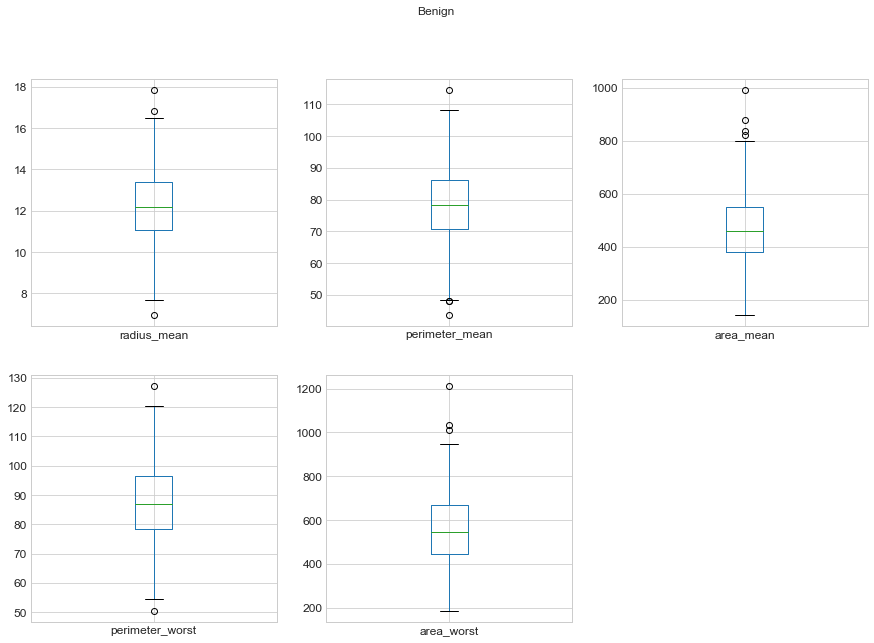

In [282]:
#  A boxplot for the split benignData

boxBenign = keybData.plot(kind= 'box', title = "Benign", subplots=True, layout=(2,3), 
                     sharex=False, sharey=False, fontsize=12, figsize=(15,10))

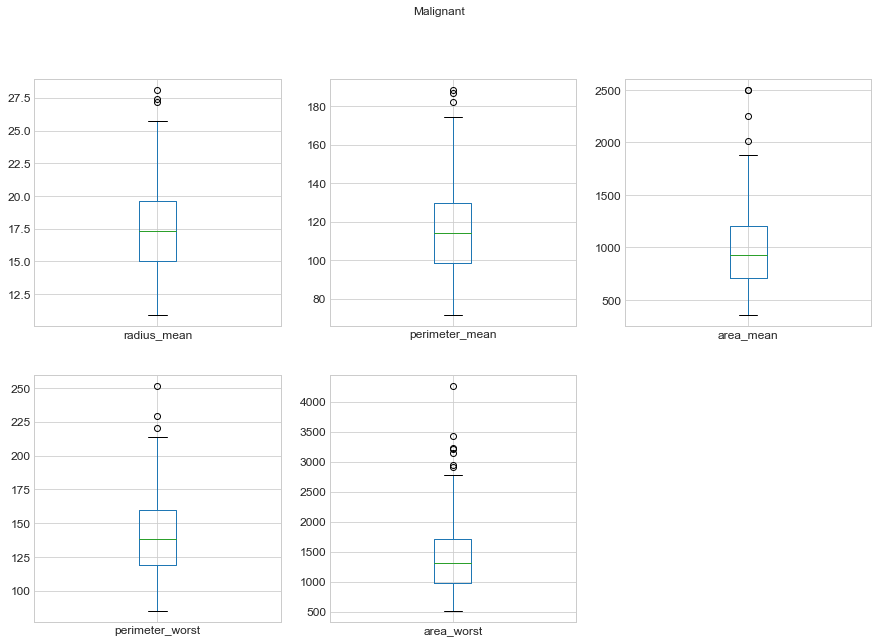

In [283]:
#  A boxplot for the split maligData

boxMalig = keymData.plot(kind= 'box', title = "Malignant", subplots=True, layout=(2,3), 
                     sharex=False, sharey=False, fontsize=12, figsize=(15,10))

First, I believe it is important to talk about why I chose to explore data with boxplots like I have. In some disciplines, boxplots get a bad wrap despite being practical. Box plots take away all the visual approximations one makes when looking at other univariate summary plots, and when combined with histograms or density plots, tell a much clearer story than either option could on its own. John Tukey developed this method of visualization to display 7-8+ key pieces of information very simply and clearly in a way that simply cannot be done so cleanly (or at all) with other univariate displays. Whereas histograms and density plots give the observer a good opportunity to qualitatively check the behaviour of a distribution, the boxplot quantifies that behaviour and visually displays it in a new way which yields more precise information than our brains could ever pick out on their own. One could perhaps think of boxplots as a marriage between a summary statistics table and a univariate density plot which also highlights extreme values.  

I will explain some insights from the boxplots in a future section where I plot side-by-side box plots for comparison.

**A Better Way to Compare with Visualizations**  

Because I have never used python before and this is all very new to me and I am doing my best to learn these tools practically as I move along, I thought I would try to see if I could figure out how to plot these features in a way which allowed for easier visual comparisons. I have included both ways simply because this was a massive learning process for me personally and though it was very rewarding and I have learned an incredible amount, I would like to include both versions of these visualizations in case I make errors.  

First, I would like to try to overlay the density plots. I tried to do the plots in this next section many, many different ways without them coming out how I wanted, until (through a lot of searching) I found the seaborn package to be very handy for these things. By overlaying these density plots it should be very obvious which features are useful in classifying cancer diagnoses. Features not very useful would show much more overlap between benign and malignant groups and there should be a clear separation  between these groups when important classification features are displayed. 

Because of this, it is important to plot additional features beyond the ones I initially believed to be important to see the difference in the important and unimportant features when plotted by diagnosis. 

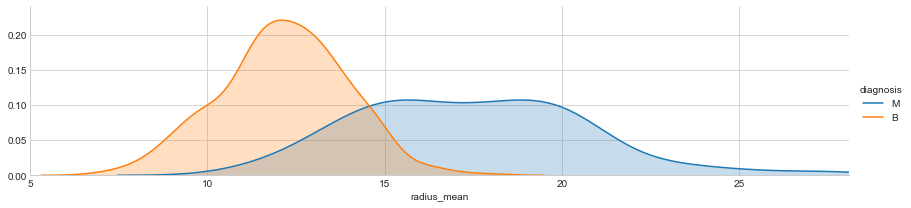

In [420]:
#   set seasborn style to whitegrid
sns.set_style("whitegrid")

#  plot for malignant and benign diagnoses based on radius_mean values
#  Seaborn calls these factor plots but it is a density plot
facet = sns.FacetGrid(cancerData, hue="diagnosis",aspect=4)
facet.map(sns.kdeplot,'radius_mean',shade= True)
facet.set(xlim=(5, cancerData['radius_mean'].max()))
facet.set(ylim=(0, 0.24))
facet.add_legend();

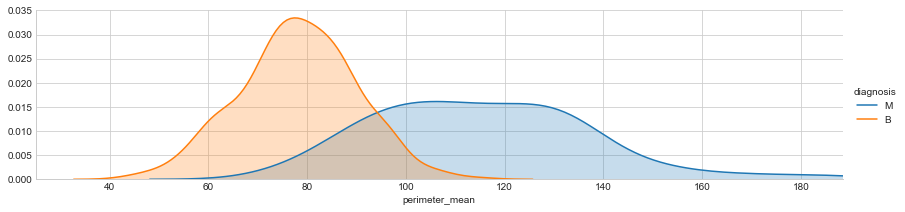

In [417]:
#  plot for malignant and benign diagnoses based on perimeter_mean values
#  Seaborn calls these factor plots but it is a density plot
facet = sns.FacetGrid(cancerData, hue="diagnosis",aspect=4)
facet.map(sns.kdeplot,'perimeter_mean',shade= True)
facet.set(xlim=(25, cancerData['perimeter_mean'].max()))
facet.set(ylim=(0, 0.035))
facet.add_legend();

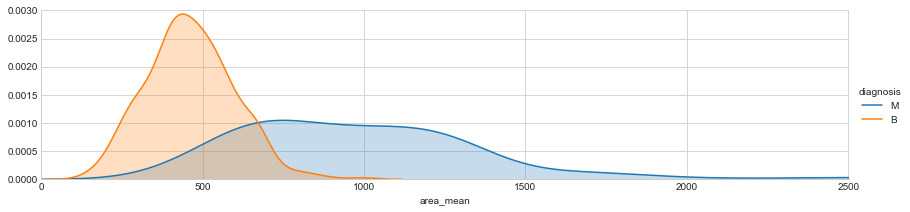

In [333]:
#  plot for malignant and benign diagnoses based on area_mean values
#  Seaborn calls these factor plots but it is a density plot
facet = sns.FacetGrid(cancerData, hue="diagnosis",aspect=4)
facet.map(sns.kdeplot,'area_mean',shade= True)
facet.set(xlim=(0, cancerData['area_mean'].max()))
facet.set(ylim=(0, 0.0030))
facet.add_legend();

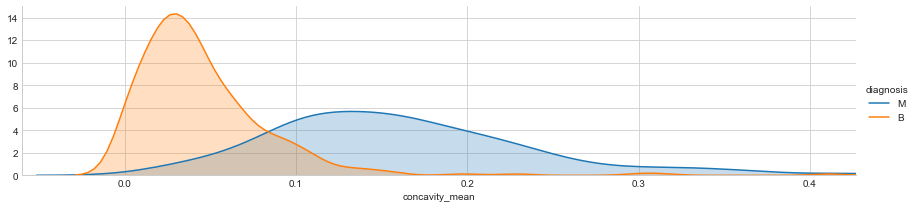

In [404]:
#  plot for malignant and benign diagnoses based on concavity_mean values
#  Seaborn calls these factor plots but it is a density plot
facet = sns.FacetGrid(cancerData, hue="diagnosis",aspect=4)
facet.map(sns.kdeplot,'concavity_mean',shade= True)
#  xlim= (cancerData['concavity_mean'].min(), ...) was not working for the xlim lower boundary
facet.set(xlim=(-.060, cancerData['concavity_mean'].max()))
facet.set(ylim=(0, 15))
facet.add_legend();

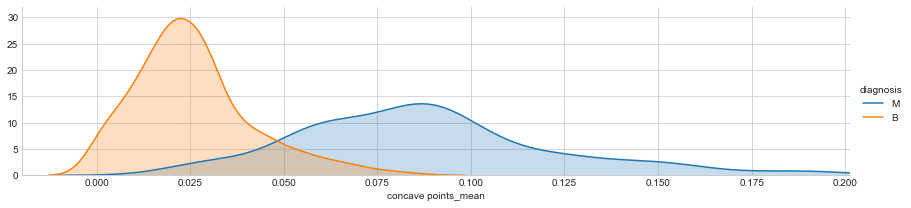

In [416]:
#  plot for malignant and benign diagnoses based on concave points_mean values
#  Seaborn calls these factor plots but it is a density plot
facet = sns.FacetGrid(cancerData, hue="diagnosis",aspect=4)
facet.map(sns.kdeplot,'concave points_mean',shade= True)
facet.set(xlim=(-.020, cancerData['concave points_mean'].max()))
facet.set(ylim=(0, 32))
facet.add_legend();

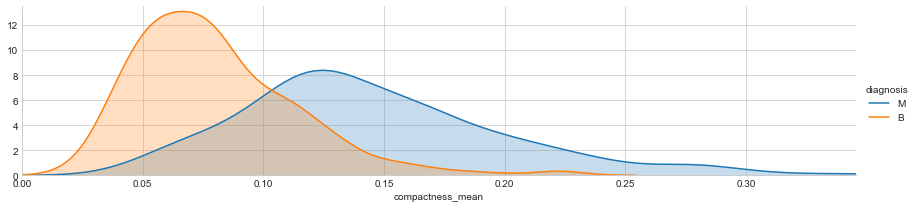

In [425]:
#  plot for malignant and benign diagnoses based on compactness_mean values
#  Seaborn calls these factor plots but it is a density plot
facet = sns.FacetGrid(cancerData, hue="diagnosis",aspect=4)
facet.map(sns.kdeplot,'compactness_mean',shade= True)
facet.set(xlim=(0, cancerData['compactness_mean'].max()))
facet.set(ylim=(0, 13.5))
facet.add_legend();

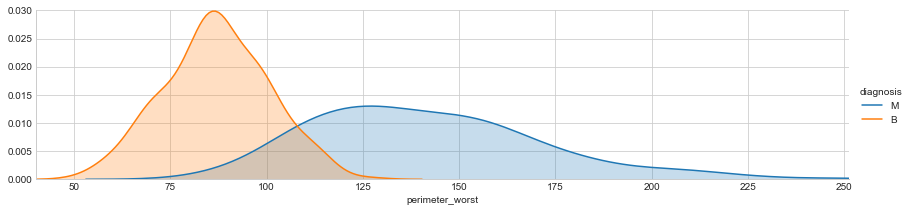

In [422]:
#  plot for malignant and benign diagnoses based on perimeter_worst values
#  Seaborn calls these factor plots but it is a density plot
facet = sns.FacetGrid(cancerData, hue="diagnosis",aspect=4)
facet.map(sns.kdeplot,'perimeter_worst',shade= True)
facet.set(xlim=(40, cancerData['perimeter_worst'].max()))
facet.set(ylim=(0, 0.030))
facet.add_legend();

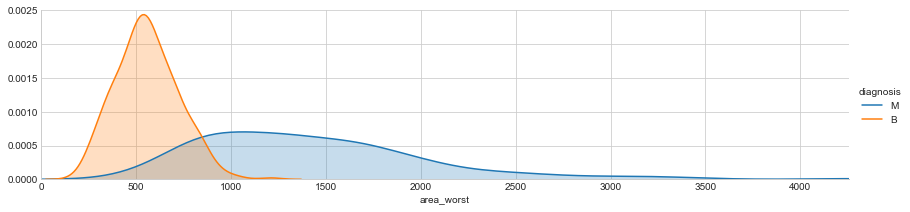

In [344]:
#  plot for malignant and benign diagnoses based on area_worst values
#  Seaborn calls these factor plots but it is a density plot
facet = sns.FacetGrid(cancerData, hue="diagnosis",aspect=4)
facet.map(sns.kdeplot,'area_worst',shade= True)
facet.set(xlim=(0, cancerData['area_worst'].max()))
facet.set(ylim=(0, 0.0025))
facet.add_legend();

What is important to notice about the features plotted above is a very distinct difference that can be seen between values of each feature among benign cases versus values for each feature among malignant cases. Essentially, it is very easy to observe very distinct distributions of subsets which share only a small amount of overlap. If we did not know class labels, seeing distinct density plots split across some condition would point out that these cases likely came from different populations.  Because we know class labels we know that in fact they do come from two different populations: patients with benign tumors and patients with malignant tumors. Thus, if these features are in fact important for tumor classification they ought to have little overlap when split by diagnosis. This gives further support to my initial assumptions and suggest that these features are very important when it comes to classifying cancer diagnoses. These features include the ones I initally suspected would be key classification features (radius_mean, perimeter_mean, area_mean, perimeter_worst, and area_worst), as well as concavity_mean, concave points_mean, and compactness_mean. It is clear thar larger mean values of these features are related to malignant tumors.

In addition, it seems that taking the time to figure out how to display these visualizations in this way has definitely paid off. The spread of values in both subsets area very noticeable in these distributions and the presence of very large values which create these long tails in the malignant subset are depicted nicely.  

The plots below reveal features that are likely not useful for classification purposes.

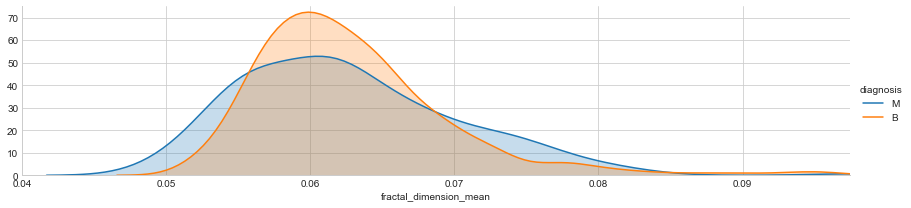

In [430]:
#  plot for malignant and benign diagnoses based on fractal_dimension_mean values
#  Seaborn calls these factor plots but it is a density plot
facet = sns.FacetGrid(cancerData, hue="diagnosis",aspect=4)
facet.map(sns.kdeplot,'fractal_dimension_mean',shade= True)
facet.set(xlim=(0.04, cancerData['fractal_dimension_mean'].max()))
facet.set(ylim=(0, 75))
facet.add_legend();

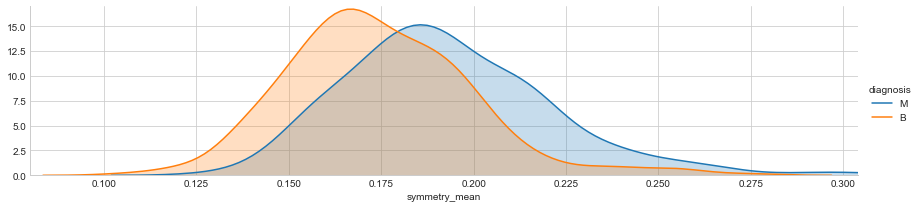

In [433]:
#  plot for malignant and benign diagnoses based on symmetry_mean values
#  Seaborn calls these factor plots but it is a density plot
facet = sns.FacetGrid(cancerData, hue="diagnosis",aspect=4)
facet.map(sns.kdeplot,'symmetry_mean',shade= True)
facet.set(xlim=(0.08, cancerData['symmetry_mean'].max()))
facet.set(ylim=(0, 17))
facet.add_legend();

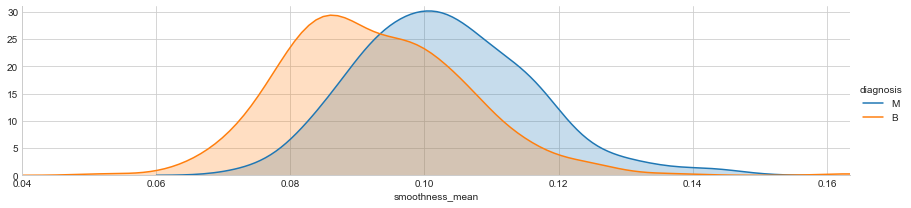

In [440]:
#  plot for malignant and benign diagnoses based on smoothness_mean values
#  Seaborn calls these factor plots but it is a density plot
facet = sns.FacetGrid(cancerData, hue="diagnosis",aspect=4)
facet.map(sns.kdeplot,'smoothness_mean',shade= True)
facet.set(xlim=(0.04, cancerData['smoothness_mean'].max()))
facet.set(ylim=(0, 31))
facet.add_legend();

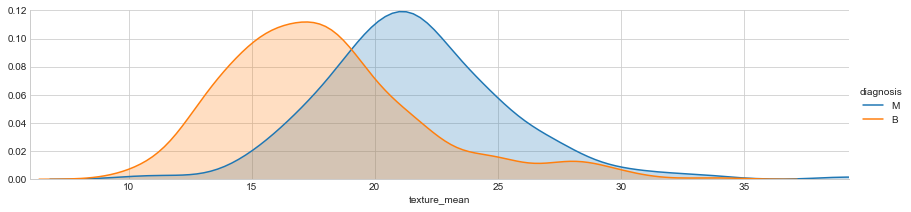

In [442]:
#  plot for malignant and benign diagnoses based on texture_mean values
#  Seaborn calls these factor plots but it is a density plot
facet = sns.FacetGrid(cancerData, hue="diagnosis",aspect=4)
facet.map(sns.kdeplot,'texture_mean',shade= True)
facet.set(xlim=(6, cancerData['texture_mean'].max()))
facet.set(ylim=(0, 0.12))
facet.add_legend();

It is clear that the distinct separation of benign and malignant groups in the above plots do not exist. There is large amounts of overlap between groups because benign and malignant cells seem to not differ much in terms of these features. These plots suggest that the above features are not likely to be important when it comes to classifying cancer diagnoses.  

I would like to quickly mention what I believe to be a limitation of plotting features in the way that I have above. A good observation to make would be that because these plots are now being overlaid as different distributions displayed in the same geometric window, some finer details are lost, especially in the tails and peaks. If you compare these plots to the details one can see in the individual plots, it is obvious that some things are gained and some things are lost. What is gained by overlaying the plots is an ease of comparison between diagnosis labels. That being said, because the standard deviations of the benign patient feature values seems to be much smaller than those of the malignant feature values, the values are more tightly packed around their distribution centers resulting in a much higher peaks in geometric space. To accommodate these higher peaks, the y-axis must be larger. The result of this is that the malignant distributions (which have much greater spreads of feature values and thus, a lesser vertical density maximum peak and a greater horizontal range) are viewed in less detail and some subtle tendencies are not visible. Because some of these finer details are lost, a few of the overlaid plots look almost identical. Perhaps though, this tells us something about the nature of developing cancer cells.

Next I tried to successfully make one of my favorite  univariate visualizations for categorical comparison which is the side-by-side boxplot. I believe that looking at features in this way gives a more clear understanding of important features which describe the distributions (as mentioned previously) as well as facilitating effortless comparison between subsets.

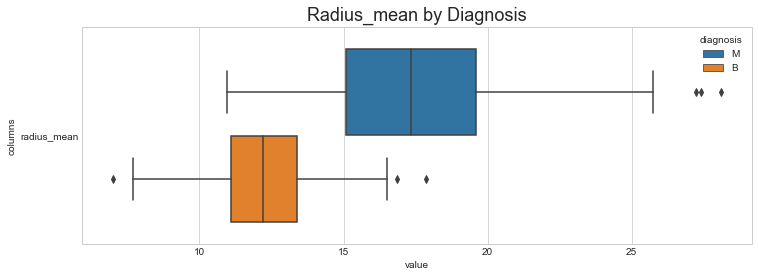

In [284]:
#  melt bcancerData into a format easier to use with seaborn for this type of plot:
cancerMelt = cancerData.melt(id_vars = 'diagnosis', 
                                   value_vars = ['radius_mean',
                                                 'perimeter_mean',
                                                 'area_mean',
                                                 'perimeter_worst',
                                                 'area_worst'],
                                   var_name = 'columns')



# ask for a figure with one subplot, set figure size
fig, ax = plt.subplots()
fig.set_size_inches(12,4)

#  creates a boxplot for radius_mean, grouped by diagnosis, specifying horizontal orientation.
radBox = sns.boxplot(data = cancerMelt,
                 hue = 'diagnosis',
                 x = 'value',
                 y = 'columns',
                 order = ['radius_mean'],
                 orient = 'h',
                 ax = ax)

#  add title and title font size
plt.title('Radius_mean by Diagnosis', fontsize = '18');


Here, the Radius_mean feature is plotted, we can see the median radius value of the malignant group is actually higher than the upper whisker of the benign group. There is no overlap in the interquartile ranges for these side-by-side plots which suggests tome that this feature would be important for classifying cancer diagnoses.

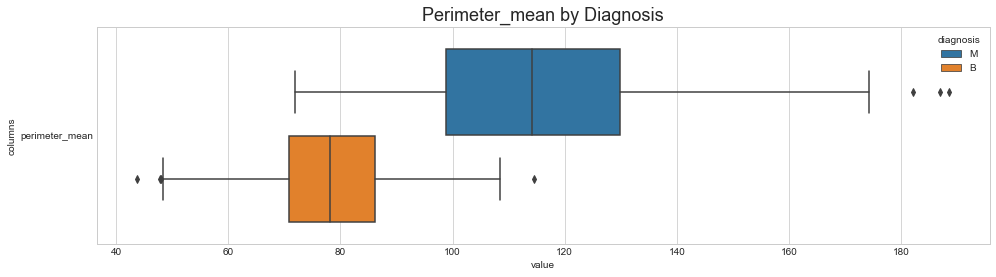

In [285]:
#  ask for a figure with one subplot, set figure size
fig, ax = plt.subplots()
fig.set_size_inches(16,4)

#  creates a boxplot for perimeter_mean, grouped by diagnosis, specifying horizontal orientation.
perBox = sns.boxplot(data = cancerMelt,
                 hue = 'diagnosis',
                 x = 'value',
                 y = 'columns',
                 order = ['perimeter_mean'],
                 orient = 'h',
                 ax = ax)

#  add title and title font size
plt.title('Perimeter_mean by Diagnosis', fontsize = '18');

We see the same tendency of the precious box plots displayed in this visualization. Again the centers of the distrubtions to not overlap and it is easy to see that large right tail pulling the spread of the malignant group to a large value. 

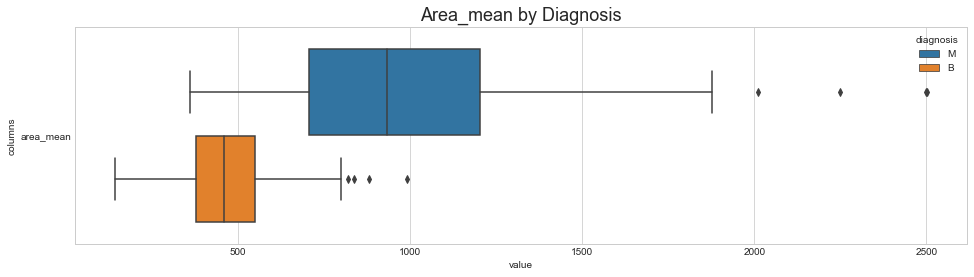

In [286]:
#  ask for a figure with one subplot, set figure size
fig, ax = plt.subplots()
fig.set_size_inches(16,4)

#  creates a boxplot for area_mean, grouped by diagnosis, specifying horizontal orientation.
areaBox = sns.boxplot(data = cancerMelt,
                 hue = 'diagnosis',
                 x = 'value',
                 y = 'columns',
                 order = ['area_mean'],
                 orient = 'h',
                 ax = ax)

#  add title and title font size
plt.title('Area_mean by Diagnosis', fontsize = '18');


This boxplot was particularly interesting to me, the density of the benign group is very well displayed here as the benign area_mean distriution looks close to a normal distriution. 

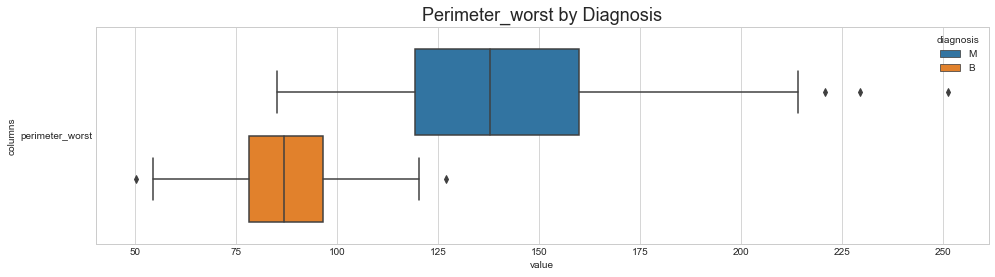

In [287]:
#  ask for a figure with one subplot, set figure size
fig, ax = plt.subplots()
fig.set_size_inches(16,4)

#  creates a boxplot for perimeter_worst, grouped by diagnosis, specifying horizontal orientation.
perwBox = sns.boxplot(data = cancerMelt,
                 hue = 'diagnosis',
                 x = 'value',
                 y = 'columns',
                 order = ['perimeter_worst'],
                 orient = 'h',
                 ax = ax)

#  add title and title font size
plt.title('Perimeter_worst by Diagnosis', fontsize = '18');


Again, the benign distribution looks normal and the malignant distribution looks positively skewed with an impressive standard deviation.

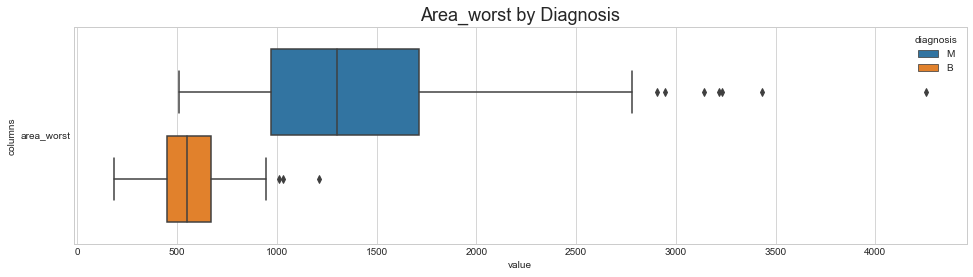

In [288]:
#  ask for a figure with one subplot, set figure size
fig, ax = plt.subplots()
fig.set_size_inches(16,4)

#  creates a boxplot for perimeter_worst, grouped by diagnosis, specifying horizontal orientation.
areawBox = sns.boxplot(data = cancerMelt,
                 hue = 'diagnosis',
                 x = 'value',
                 y = 'columns',
                 order = ['area_worst'],
                 orient = 'h',
                 ax = ax)

#  add title and title font size
plt.title('Area_worst by Diagnosis', fontsize = '18');


These plots obviously should be, and are, very different from each other. The worst areas for the malignant subset are massively larger than those of the benign subset.

Now the magnitude of mean differences of these attribute values between the two groups is very clear. Not only do the malignant patients have higher values on these measures, the presence of these extreme scores further pulls the group mean to a higher value and inflates the spread of the data. The mean value is further influenced by extreme scores due to the fact that the malignant subset of patients accounts for a smaller number of records than the benign subset. An observant individual might also notice in some cases the benign group means are being pulled down by a few very low scores relative to their corresponding mean. These initial striking differences now have some context.  

I would like to mention that the outliers displayed on these boxplots are not a concern to me for the current classification analysis and if there were I would need to investigate them in a lot more detail.

** Preprocessing considerations**

In terms of required pre-processing, the data set already contains some features created from existing features such as the variables labelled 'worst' which include the means of the 3 largest feature values for each patient. Aggregating features would not be very useful for this dataset as there aren't really any features needing aggregation. A couple areas of preprocessing which would likely be applicable here would be dimensionality reduction through PCA and possibly a standard transformation of variables. 

A first step would be to assign our target category 'diagnosis' from the levels 'M' and 'B' to the integers 1 and 0. 

In [448]:
#  Encodes the diagnosis column in a new column such that malignant tumors are represented as a 1 and benign tumors 
#  are represented as a 0. 
le = LabelEncoder()
cancerData["dig_encode"] = le.fit_transform(cancerData['diagnosis'])

#  check to see if the encoding worked, recall we had 357 benign and 212 malignant cases:
cancerData['dig_encode'].value_counts()

0    357
1    212
Name: dig_encode, dtype: int64

A better way to do this would be to encode the diagnosis column in a new object because it will make PCA easier. I included both here because I was not sure which was the prefered method. 

In [449]:
# delete dig_encode:
del cancerData['dig_encode']
# make sure it is deleted:
cancerData.head(1)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189


In [516]:
#  Put cancerData values in a NumPy array object
canArray = cancerData.values

#  slice all features from array besides diagnosis
features = canArray[:,1:]
#  assign diagnosis to target
target = canArray[:,0]
#  encode diagnosis column as integers
target = le.fit_transform(target)

#  can check to see how this works by calling this transform function on two made up character values 'M' and 'B'
#  notice how the output changes the M to a 1 and the B to a 0. 
le.transform (['M', 'B'])  #; to hide output

AttributeError: 'numpy.ndarray' object has no attribute 'head'

**Standard Transformation**

Initially, when I tried to plot the side-by-side box plots together I quickly realized I could not because of the greatly different scale values each attribute had. This can also be seen by looking at the x-axis of the density plots. This has to do with the fact that radius, area, and perimeters are calculated in different ways. For example, if we look at these values, mean area values are almost an order of magnitude larger than perimeter feature values (for the malignant subset). What I take away from this section of the textbook is that if we looked to compare patients with benign tumors to patients with malignant tumors based on these features, the difference in nucleus areas would be much greater than the differences in nucleus perimeters and nucleus radiuses and thus the comparison between patients would be dominated by the difference of nucleus areas. Because of this, I would predict that the feature weighting for area_mean and area_worst features would be greater than other features if we do not standardize these features and thus could play a more important role in some of the classification models.

**Principle components analysis**

First, it might be beneficial to look at the results of a Principal Components Analysis on the raw data and compare that to the results of a PCA of normally transformed data to see if the assumptions about feature waiting are in any way true.   


Principal Components Analysis is a dimensionality reduction method for continuous features like the ones in the current data set. Recall all of our features except the target were floats. The concept behind PCA is to take values in high-dimensional space and represent them as principal components in lower-dimensional space. PCA is considered a linear transformation because, on the case of the current data, we have over 30 features representing each record in our data set, and PCA looks to derive a simpler descriptive model of the dataset by producing linear combinations of the features (visually this looks like drawing a line through data in dimensional space). Principal components are also orthogonal meaning they form right-angles which split the data in dimensional space into sections which separate values across a categorical value, or at least try to find these meaningful separations which can model the data in a much more simple way. For instance, if we plotted the values of some features in 2 dimensional space and overlaid a primary principal component on the x-axis and a secondary component on the y-axis, the lines would intersect at some point dividing the plane into 4 sections. If, for example, the first principal component described the data very well we would see that values for one level of a categorical grouping would sit nicely on one side of the vertical line extending out from the x-axis while values for the other level sat on the other side of the vertical line. Traditionally, this type of plot is called a score plot. To plot three principal components at once, a 3-dimensional plot would be required. The goal of PCA is to reduce the amount of dimensions  while retaining as much variance in the data as possible. How these principal components end up describing the data depends on the existing variance of the features and thus without standardizing these values I am quite sure that the larger absolute deviations of the area values will dominate the PC calculations as the weight of the area features will be disproportionately large.


In [513]:
from sklearn.decomposition import PCA

#  pca for features array
pca = PCA(n_components = 5)
fit = pca.fit(features)
pca.fit(features)
# summarize components / feature weighting
print("Explained variance in percentages")
print(fit.components_)

Explained variance in percentages
[[  5.08623202e-03   2.19657026e-03   3.50763298e-02   5.16826469e-01
    4.23694535e-06   4.05260047e-05   8.19399539e-05   4.77807775e-05
    7.07804332e-06  -2.62155251e-06   3.13742507e-04  -6.50984008e-05
    2.23634150e-03   5.57271669e-02  -8.05646029e-07   5.51918197e-06
    8.87094462e-06   3.27915009e-06  -1.24101836e-06  -8.54530832e-08
    7.15473257e-03   3.06736622e-03   4.94576447e-02   8.52063392e-01
    6.42005481e-06   1.01275937e-04   1.68928625e-04   7.36658178e-05
    1.78986262e-05   1.61356159e-06]
 [  9.28705650e-03  -2.88160658e-03   6.27480827e-02   8.51823720e-01
   -1.48194356e-05  -2.68862249e-06   7.51419574e-05   4.63501038e-05
   -2.52430431e-05  -1.61197148e-05  -5.38692831e-05   3.48370414e-04
    8.19640791e-04   7.51112451e-03   1.49438131e-06   1.27357957e-05
    2.86921009e-05   9.36007477e-06   1.22647432e-05   2.89683790e-07
   -5.68673345e-04  -1.32152605e-02  -1.85961117e-04  -5.19742358e-01
   -7.68565692e-05 

In [490]:
#  how much variance that each component explains
pcExplain= pca.explained_variance_ratio_
#  cumulative variance for each component seperately
cumVar=np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 6)*100)
print(cumVar)

[ 98.2045  99.8221  99.9779  99.99    99.9988]


Here it looks like 98.2% of total variance is explained by first principle component. Conceptually, I wanted to print out the feature weightings of each feature for the first few principle components but after trying many things I concluded I need much more practice before I would be able to get that to work out just how I wanted it to. Instead, I will just have to eye the explained variances I printed to screen in their scientific notations to make sense of feature weightings. What I am looking for are the features in the first component (first set of [square] brackets - ie: the first list in the output) which have the highest weightings. To do this I looked at the scientific notation indicating how many positions the decimal places needed to be more to the right. By looking at the first principle component, two features require one decimal place shift to the right indicating that these two features are very important (much larger value than the other features). Those features are at column position 3 and column position 23 (or 4 and 24 if we start counting from 1 instead of 0) of the 'features' array.  

To find these positions, the columns of the original data can be printed, since the 'features' array contains every column except the first column 'diagnosis' we can see that the features with the most weight in the first principle component were 'area_mean' and 'area_worst'. Something that is very exciting to me is that what I thought I understood from the textbook is exactly correct in this circumstance. Because we are dealing with calculations of variance and the area feature values are larger due how area is calculated (results in a larger value than perimeter or radius etc) the variance will scale proportionally with the larger values in general. Area values which are an arbitrary distance from their mean will have a larger deviation in terms of absolute value and thus contribute to a larger sum of squared deviations, resulting in a larger variance overall when compared to values like radius and perimeter which take on values smaller in magnitude. As previously stated, I believed that if the features were not transformed that the feature with the largest scale values (area_mean and area_worst) would dominate this variance calculation (this is what the text mentioned). If there is only so much variance to be explained in our data set by our simpler principal components, it would make sense that before standardization, area features would be misleading. Because this seems the case, I believe if PCA is on the agenda it is probably best to transform these variables. Although I have do not fully understand everything about PCA this is the conclusion I have come to. It makes sense to me that performing a task like this, features should be centered around the same value and their spread ought to be standardized.


In [484]:
#  Look for columns 3 and 23, counting from 0 and begining from column 'radius_mean'
cancerData.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

As I am not comfortable making final decisions about retaining principle components, I am going to decide which features to retain based solely on descriptive statistics, visualizations, and correlations. That being said, if I did want to rely on PCA I would need to look at a scree plot of the priniciple components to know how many PC's to keep. 

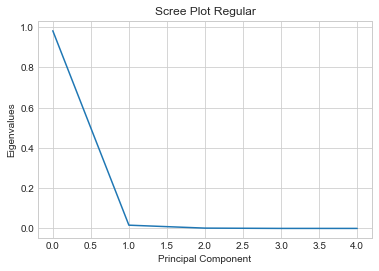

In [511]:
#  scree plot for pcExplain
plt.plot(pcExplain)
plt.title('Scree Plot Regular')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalues')
#  show plot
plt.show()

Looking at this scree plot further makes me believe standardization is necessary because the plot shows a dramatic elbow at the first component and no gradual step function of any kind leading up to a less pronounced elbow leading me to believe there is something wrong with the PCA. The scree plot should not look like this. This scree plot says that the first component contributors entirely to the new, simpler explanation of our data set and the other components do not add any additionally meaningful contribution in terms of explained variance in the data.

To investigate more I am going to fit the values to a standard distribution of values and this should fix the scree plot.

In [529]:
from sklearn.preprocessing import StandardScaler

#  normalize features
scaler = StandardScaler()
standFeat = scaler.fit_transform(features)

# pca specifying 5 components (somewhat arbitrary)
pca = PCA(n_components = 5)
fit = pca.fit(standFeat)
pca.fit(standFeat)
# summarize components
print("Explained variance in percentages")
print(fit.components_)

Explained variance in percentages
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.23271589  0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796412 -0.00825723  0.14188335  0.27533947]
 [-0.00853125  0.06454991 -0.00931423  0.02869952 -0.10429196 -0.07409158
   0.00273387 -0.0255635  -0.04023994 -0.02257406  0.26848139  0.37463367
   0.26664537  0.21600652  0.308839    0.15477966  0.17646372  0.22465759
   

In [509]:
#The amount of variance that each PC explains
normExplain= pca.explained_variance_ratio_
#Cumulative Variance overall for each component
normVar=np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 6)*100)
print(normVar)

[ 44.272   63.2432  72.6364  79.2385  84.7343]


Now the first component only explains 44.3% of total variance and gradually more and more is explained as components are considered. It is also obvious that the area_mean and area_worst features no longer completely dominate the calculation of the first principal component and the components are now a more meaningful combination of features.

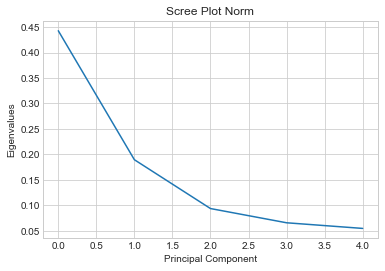

In [510]:
#  scree plot for normExplain
plt.plot(normExplain)
plt.title('Scree Plot Norm')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalues')
#  show plot
plt.show()

Based on this scree plot, if I was going to use PCA for my actual machine learning phase, I would retain the first three components. The elbow was not so obvious but looking at the plot in comparison to the changes of cumulative variance explained 3 components seems correct. This scree plot says that our dataset is best described by the first three components and additional components do not add any significant explanation of the variance in the data.

**Feature Subset Selection**  

Although I believe I have successfully completed the correct method of PCA and determined how many components are important to retain, I am going to choose a feature subset for machine learning purposes based off of methods derived from the data in its most raw state. This decision was arrived at though careful consideration of the data set at hand as well as the nature of the feature groupings. Of course, the best method is to try as many feature subset combinations as possible, compare the test results, and select the subset which produces the best result. That being said, at this point it is quite obvious which features are important in terms of classifying tumor diagnoses and the distinct grouping of values within diagnosis groups for certain features is very apparent. Thus, I will use a filter approach to feature subset selection as I will be selecting important features before running the algorithms.  

After many visualizations and inspecting descriptive statistics, important features have been identified. To further inform my selection I will consider a common filter selection approach which is looking at feature bivariate correlations to diagnosis. To make these correlations easier to compare I will visualize their coefficient values as a bar plot. 

In [544]:
#  First need to overwrite the actual diagnosis feature in the cancerData data frame.

#  Already did this part but to repeat:
le = preprocessing.LabelEncoder()
le.fit(['M', 'B'])
cancerData['diagnosis'] = le.transform(cancerData['diagnosis'])

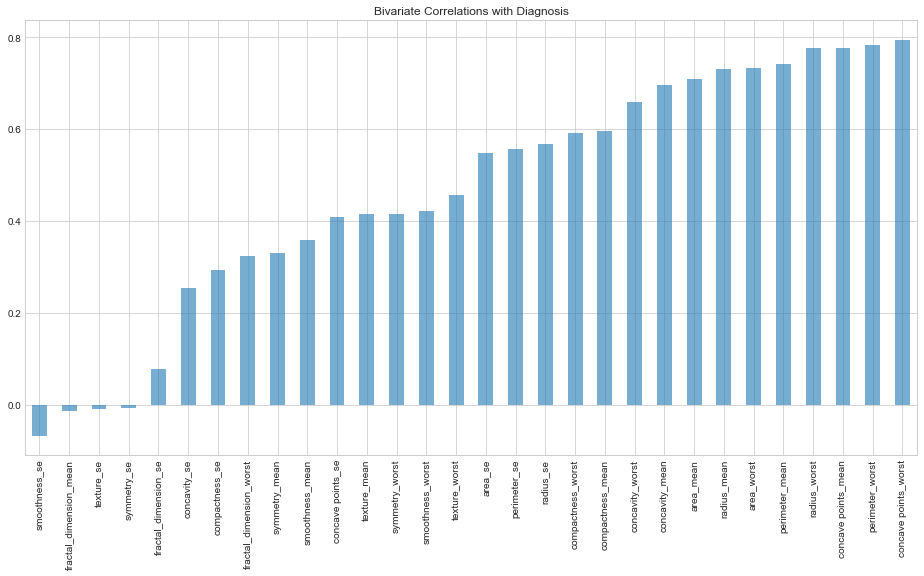

In [545]:
#  calculate bivarite correlation to diagnosis
corrInfo = cancerData.corr()['diagnosis'].copy()
#  drop diagnosis correlation to itself
corrInfo = corrInfo.drop('diagnosis')
#  sort coefficients from smallest to largest
corrInfo.sort_values(inplace=True)
#  plot
corrInfo.plot(kind='bar', alpha=0.6, figsize=(16, 8), title = 'Bivariate Correlations with Diagnosis');

For obvious reasons the features comprised of standard error calculations will not be considered. As previously assumed, most of the mean features will be kept as well as the worst features, not including symmetry, smoothness, texture, and fractal. Mean and worst features determined not to be useful when density plots were inspected are weakly correlated to diagnosis type and thus will not be included for classification purposes.

In [570]:
#  create a subset including only the features important for classification
subset = list(cancerData.columns[1:9]) + ['area_worst'] + ['perimeter_worst'] + ['radius_worst'] + ['concave points_worst'] + ['concavity_worst'] + ['compactness_worst']
subData = cancerData.loc[:,subset]
tarData = cancerData['diagnosis']

#  get rid of features not important for classification
subData.drop(['texture_mean', 'smoothness_mean'],axis=1,inplace=True)

In [572]:
#  make sure the subset selection data contains the proper features:
subData.head(1)

,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,area_worst,perimeter_worst,radius_worst,concave points_worst,concavity_worst,compactness_worst
0,17.99,122.8,1001.0,0.2776,0.3001,0.1471,2019.0,184.6,25.38,0.2654,0.7119,0.6656


One issue I think might arise using this subset is that it is a tangled web of shared variance. Although a lot of these features reveal large bivariate correlations with diagnosis, the default method used is a Pearsons r which is an effect size. These effect sizes are misleading when we look at all of these features due to their own correlations with each other being very significant. In some cases the relationship between some of these features is almost perfectly linearly described. For instance, radius_mean and perimeter_mean share an almost perfect bivariate correlation. This makes sense when we think about how all of these features are simply slightly different calculations to measure the same thing: a nucleus. Because these features share such strong relationships, a quantitative and qualitative issue arises. Quantitatively, one cannot know by looking at correlations with diagnosis how much variance described by any one feature is unique to that feature and how much is shared between other features. We can however, make a good assumption that there will be a ton of shared variance between features which blurs the impact of their unique contribution to classifying cancer diagnoses. Ultimately, we are looking to build a predictive model so qualitatively this begs the question: what is the value of including so many related predictors when it appears they may not be adding much in terms of unique contribution (once we account for other features in the model)? Shouldn't the model contain less of these features?   

If this were a multiple-regression model, including these features would pose a serious multicollinearity concern. Because the real difference between classification models and regression models boils down to the type of outcome variable we want to predict (discrete versus continuous), I believe that the subset might need to be smaller. I could look at partial correlations but I am not going to. Ultimately, the feature subset includes quite a few continuous features with are all related strongly at a bivariate level so I imagine I might be able to trim this sub set down to a smaller subset.


Below is a heatmap describing feature correlations.

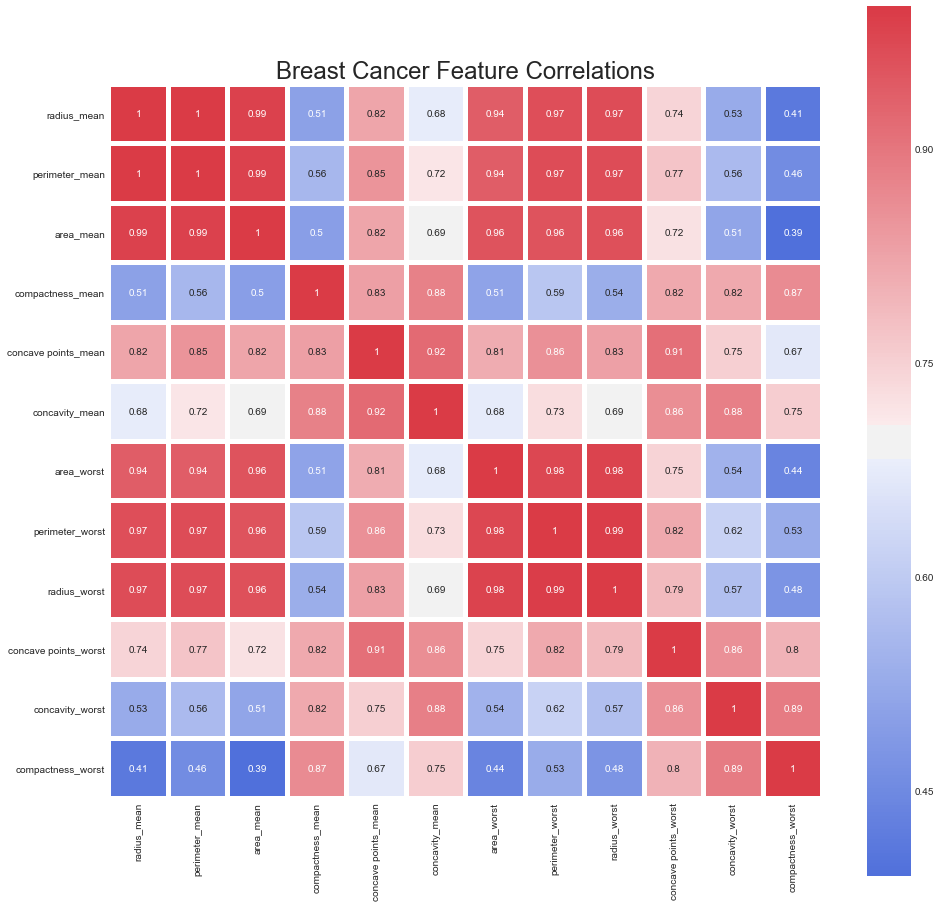

In [568]:
#  correlation for mean feature values

corCancer = cancerData.loc[:,['radius_mean', 'perimeter_mean', 'area_mean', 
                              'compactness_mean', 'concave points_mean', 
                              'concavity_mean', 'area_worst',
                              'perimeter_worst', 'radius_worst', 'concave points_worst', 
                              'concavity_worst','compactness_worst']].corr()
#  specify an 8 by 8 matrix
data, ax = plt.subplots(figsize=(16,16))
#  add title
plt.title('Breast Cancer Feature Correlations', fontsize = 24)
#  build the seaborn heatmap 
sns.heatmap(corCancer, vmax=1, square='square', cmap=cmap, 
            ax=ax, annot=True, fmt='.2g',linewidths=4);

It is clear that most of these features share very large bivariate correlations so their unique contributions to classifying cancer diagnoses are questionable.

## d) Train Models

First, I would like to mention that we have not got to most of these models yet in class and we have not touched on classification performance measures like k-fold cross-validation yet so I apologize if some of my interpretations are off base. The text only has a very small paragraph about cross-validation and so it is hard to fully appreciate why one would employ such a method before we discuss it more in class. I have done my own research however and I believe I have a solid grasp on the method.

**Naive Bayes**


In [576]:
#  import cross validation 
from sklearn import cross_validation
from sklearn.cross_validation import cross_val_score

#  import model
from sklearn.naive_bayes import GaussianNB

#  naive bayes classication
bayesClass = GaussianNB()
#  10-fold cross validation for first moodel using accuracy as performance metric
gnb_scores = cross_val_score(bayesClass, subData, tarData, cv=10, scoring='accuracy')
#  print the mean value of the accuracy for all 10 folds
print("Accuracy: ", gnb_scores.mean())

Accuracy:  0.936862630715


**Decision Tree**

In [583]:
#  import decision tree classifier
from sklearn import tree

#  store in tree object
Tree = tree.DecisionTreeClassifier()
#  10-fold cross validation for second moodel using accuracy as performance metric
tree_scores = cross_val_score(Tree, subData, tarData, cv = 10, scoring = 'accuracy')
#  print the mean value of the accuracy for all 10 folds
print("Accuracy: ", tree_scores.mean())

Accuracy:  0.903524976234


**K Nearest Neighbours**

In [580]:
#  import KNN classifier
from sklearn.neighbors import KNeighborsClassifier

#  store in knn object
knn = KNeighborsClassifier()
#  10-fold cross validation for third moodel using accuracy as performance metric
knn_scores = cross_val_score(knn, subData, tarData,  cv=10, scoring="accuracy")
#  print the mean value of the accuracy for all 10 folds
print("Accuracy: ", knn_scores.mean())

Accuracy:  0.926364402385


**SVM**

In [581]:
#  import SVM classifier
from sklearn.svm import SVC

#  store in suppVec object
suppVec = SVC()
#  10-fold cross validation for fourth moodel using accuracy as performance metric
vec_scores = cross_val_score(suppVec, subData, tarData,  cv=10, scoring="accuracy")
#  print the mean value of the accuracy for all 10 folds
print("Accuracy: ", vec_scores.mean())

Accuracy:  0.627427404719


In [584]:
#  import linear model
from sklearn.svm import LinearSVC

#  store in LinVec object
LinVec = LinearSVC()
#  10-fold cross validation for fifth moodel using accuracy as performance metric
lin_scores = cross_val_score(LinVec, subData, tarData,  cv=10, scoring="accuracy")
#  print the mean value of the accuracy for all 10 folds
print("Accuracy: ", lin_scores.mean())

Accuracy:  0.86870948924


## e) Evaluate Models



Ultimately, the accuracy metrics could be better but are decent overall. I know these performances could be improved with running of parameters for each individual model but we have not go that far in class yet so I will just compare these basic models.  

In order of performance, the classification models which had the best results using the feature subset selection I chose were:  naive bayes with 94% accuracy, KNN 93% accuracy, decision tree with 90% accuracy, linear SVM with 87% accuracy, and finally SVM with 63% accuracy. Accuracy simply reflects the number of correctly classified records divided by the total amount of records classified.

From doing my own research on the naive bayes algorithm I had a good idea that this model might yield a high accuracy value because it assumes attributes are conditionally independent, meaning if we held diagnosis or cancer stage development constant then the features of the data would be independent. As explained previously these features are very much related: the area, radius, and perimeter features are all directly related and not independent. The 'worst' features are derived from other features as well so they are also not independent. For this reason, I think the naive bayes model is not a good one to use for these features and the accuracy score is misleading.  

I believe that, again through my own research, the SVM model (if done correctly) might have been a good option for this data set. This is because it seems to allow decision boundaries to be a bit more complex than some of the simpler models and it works well with different dimensionalities of data. I also believe the amount of records in the data set would suit the SVM model decently well, if there were twice as many records, allowing for more complex decision boundaries would mean the model would not scale well or over-fit. If I chose to use the results of a PCA I think the SVM model would have revealed a much better accuracy value. I also discovered that SVM requires very thoughtful tuning of parameters and more rigorous preprocessing.  If I were knowledgeable enough to meet these requirements I am sure the results would have been quite good. Because I was not able to do this, the model did not yield good accuracy results. I chose to also include a linear SVM model because I read that it was much more flexible and required less careful preprocessing. This does seem to be the case as I was not as penalized for using this model compared to the regular SVM model.  

In terms of the KNN model I know for sure this model is not appropriate here. One key characteristic of nearest-neighbour approaches is that they can produce wrong predictions unless appropriate preprocessing is done. Since KNN uses proximity measures, the features would have had to be standardized. Although I did standardize the features for PCA, I chose not to continue with these standardized features. That being said, our goal here was to classify these types of cancer diagnoses based on cell nucleus measurements. These features included things like nucleus area, perimeter, and radius. If we build a classification model based on proximity measures, the variability of the area feature will be far greater than that of say the radius feature. Because this was not taken into consideration during preprocessing, the proximity measure would have been dominated by the mean area feature. Because of this, any instance-based learning is not appropriate for the subset I chose.  

Based on the nature of decision trees I think the accuracy rating is quite straight forward to interpret. Decision trees are quite good at dealing with noise when overfitting is a concern and the required steps have been taken to avoid this issue. I believe the noise in the current subset used was not significant enough to cause an issue for a decision tree classifier. Although a lot of the features are related it is quite clear which features are useful for classifying diagnoses so as a decision tree poses these questions to the data set and moves through the nodes it is likely to arrive at a correct class label. Most importantly though, decision trees are not impacted by redundant features (features which are strongly correlated to each other) which is the case for the features of the breast cancer data set. The decision tree should not be much larger than it has to be because redundant features would simply not be used for splitting the data. I believe the feature selection techniques I did employ effectively avoided the inclusion of irrelevant features into the tree-growing process which could have tarnished the results. 

In conclusion, if I were more capable of producing a perfect classification model I would alter preprocessing techniques for each model and considered the parameters carefully while considering the requirements and limitations for each model.


